In [1]:
from osgeo import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import FancyArrowPatch

In [2]:
lat = 50.598577
lon = 114.609124
ref_ds = gdal.Open(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\CDHW_seve\CDHW_severity_annual\CDHW_severity_1952.tif")
gt = ref_ds.GetGeoTransform()
xres, yres, xcor, ycor = gt[1], gt[5], gt[0], gt[3]
x_index = int((lon-xcor)/xres) + 1
y_index = int((lat-ycor)/yres) + 1

In [3]:
#read CDHW record shattering time series 2sigma
ds = gdal.Open(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\CDHW_seve\CDHW_record_shattering_time_series\CDHW_1991_2022_2sigma.tif")
rs_cdhw = ds.ReadAsArray()[:, y_index, x_index]

In [4]:
# Read 2002 SPEI and temperature
hw = gdal.Open(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\heatwaves\heatwave_begin_result\HeatWave_2001.tif").ReadAsArray()[:, y_index, x_index]
SPEI = gdal.Open(r"G:\SPEI_calculation\from_era5\spei_converted\SPEI_3_2001.tif").ReadAsArray()[:, y_index, x_index]/1000
for m in range(1, 13):
    if m == 1:
        temp = gdal.Open(f"G:\\ERA5-land\\ERA5_Tmax_daily\\ERA5_T2mMax_Daily_2001_{m}.tif").ReadAsArray()[:, y_index, x_index]
    else:
        temp = np.concatenate((temp, gdal.Open(f"G:\\ERA5-land\\ERA5_Tmax_daily\\ERA5_T2mMax_Daily_2001_{m}.tif").ReadAsArray()[:, y_index, x_index]))
temp = temp - 273.15

In [5]:
rs_cdhw

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [15]:
heat_th = 27.297565

In [16]:
for y in range(1952, 2023):
    if y == 1952:
        cdhw_seve = np.expand_dims(gdal.Open(f"E:\\l3\\创纪录极端复合干旱热浪事件影响生态系统生产力\\output\\CDHW_seve\\CDHW_severity_annual\\CDHW_severity_{y}.tif").ReadAsArray(), axis=0)
    else:
        cdhw_seve = np.concatenate((cdhw_seve, np.expand_dims(gdal.Open(f"E:\\l3\\创纪录极端复合干旱热浪事件影响生态系统生产力\\output\\CDHW_seve\\CDHW_severity_annual\\CDHW_severity_{y}.tif").ReadAsArray(), axis=0)), axis=0)

cdhw_seve = cdhw_seve[:, y_index, x_index]

In [17]:
test = temp_hw.copy()
test[np.isnan(test)] = 0

In [18]:
temp_hw = np.full(hw.shape, np.nan)
for i in range(len(temp)):
    if hw[i] == 0:
        continue
    else:
        temp_hw[i: i+hw[i]] = temp[i: i+hw[i]]

In [19]:
cdhw_std = gdal.Open(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\CDHW_seve\std\CDHW_severity_std.tif").ReadAsArray()[y_index, x_index]

C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_56868\2793067054.py:75: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax2.annotate('', xy=(x[1], y[1]), xytext=(x[0], y[0]), arrowprops=arrow_props)
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_56868\2793067054.py:141: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax3.annotate('', xy=(x[1], y[1]), xytext=(x[0], y[0]), arrowprops=arrow_props)
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_56868\2793067054.py:146: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax3.annotate('', xy=(x[1], y[1]), xytext=(x[0], y[0]), arrowprops=arrow_props)


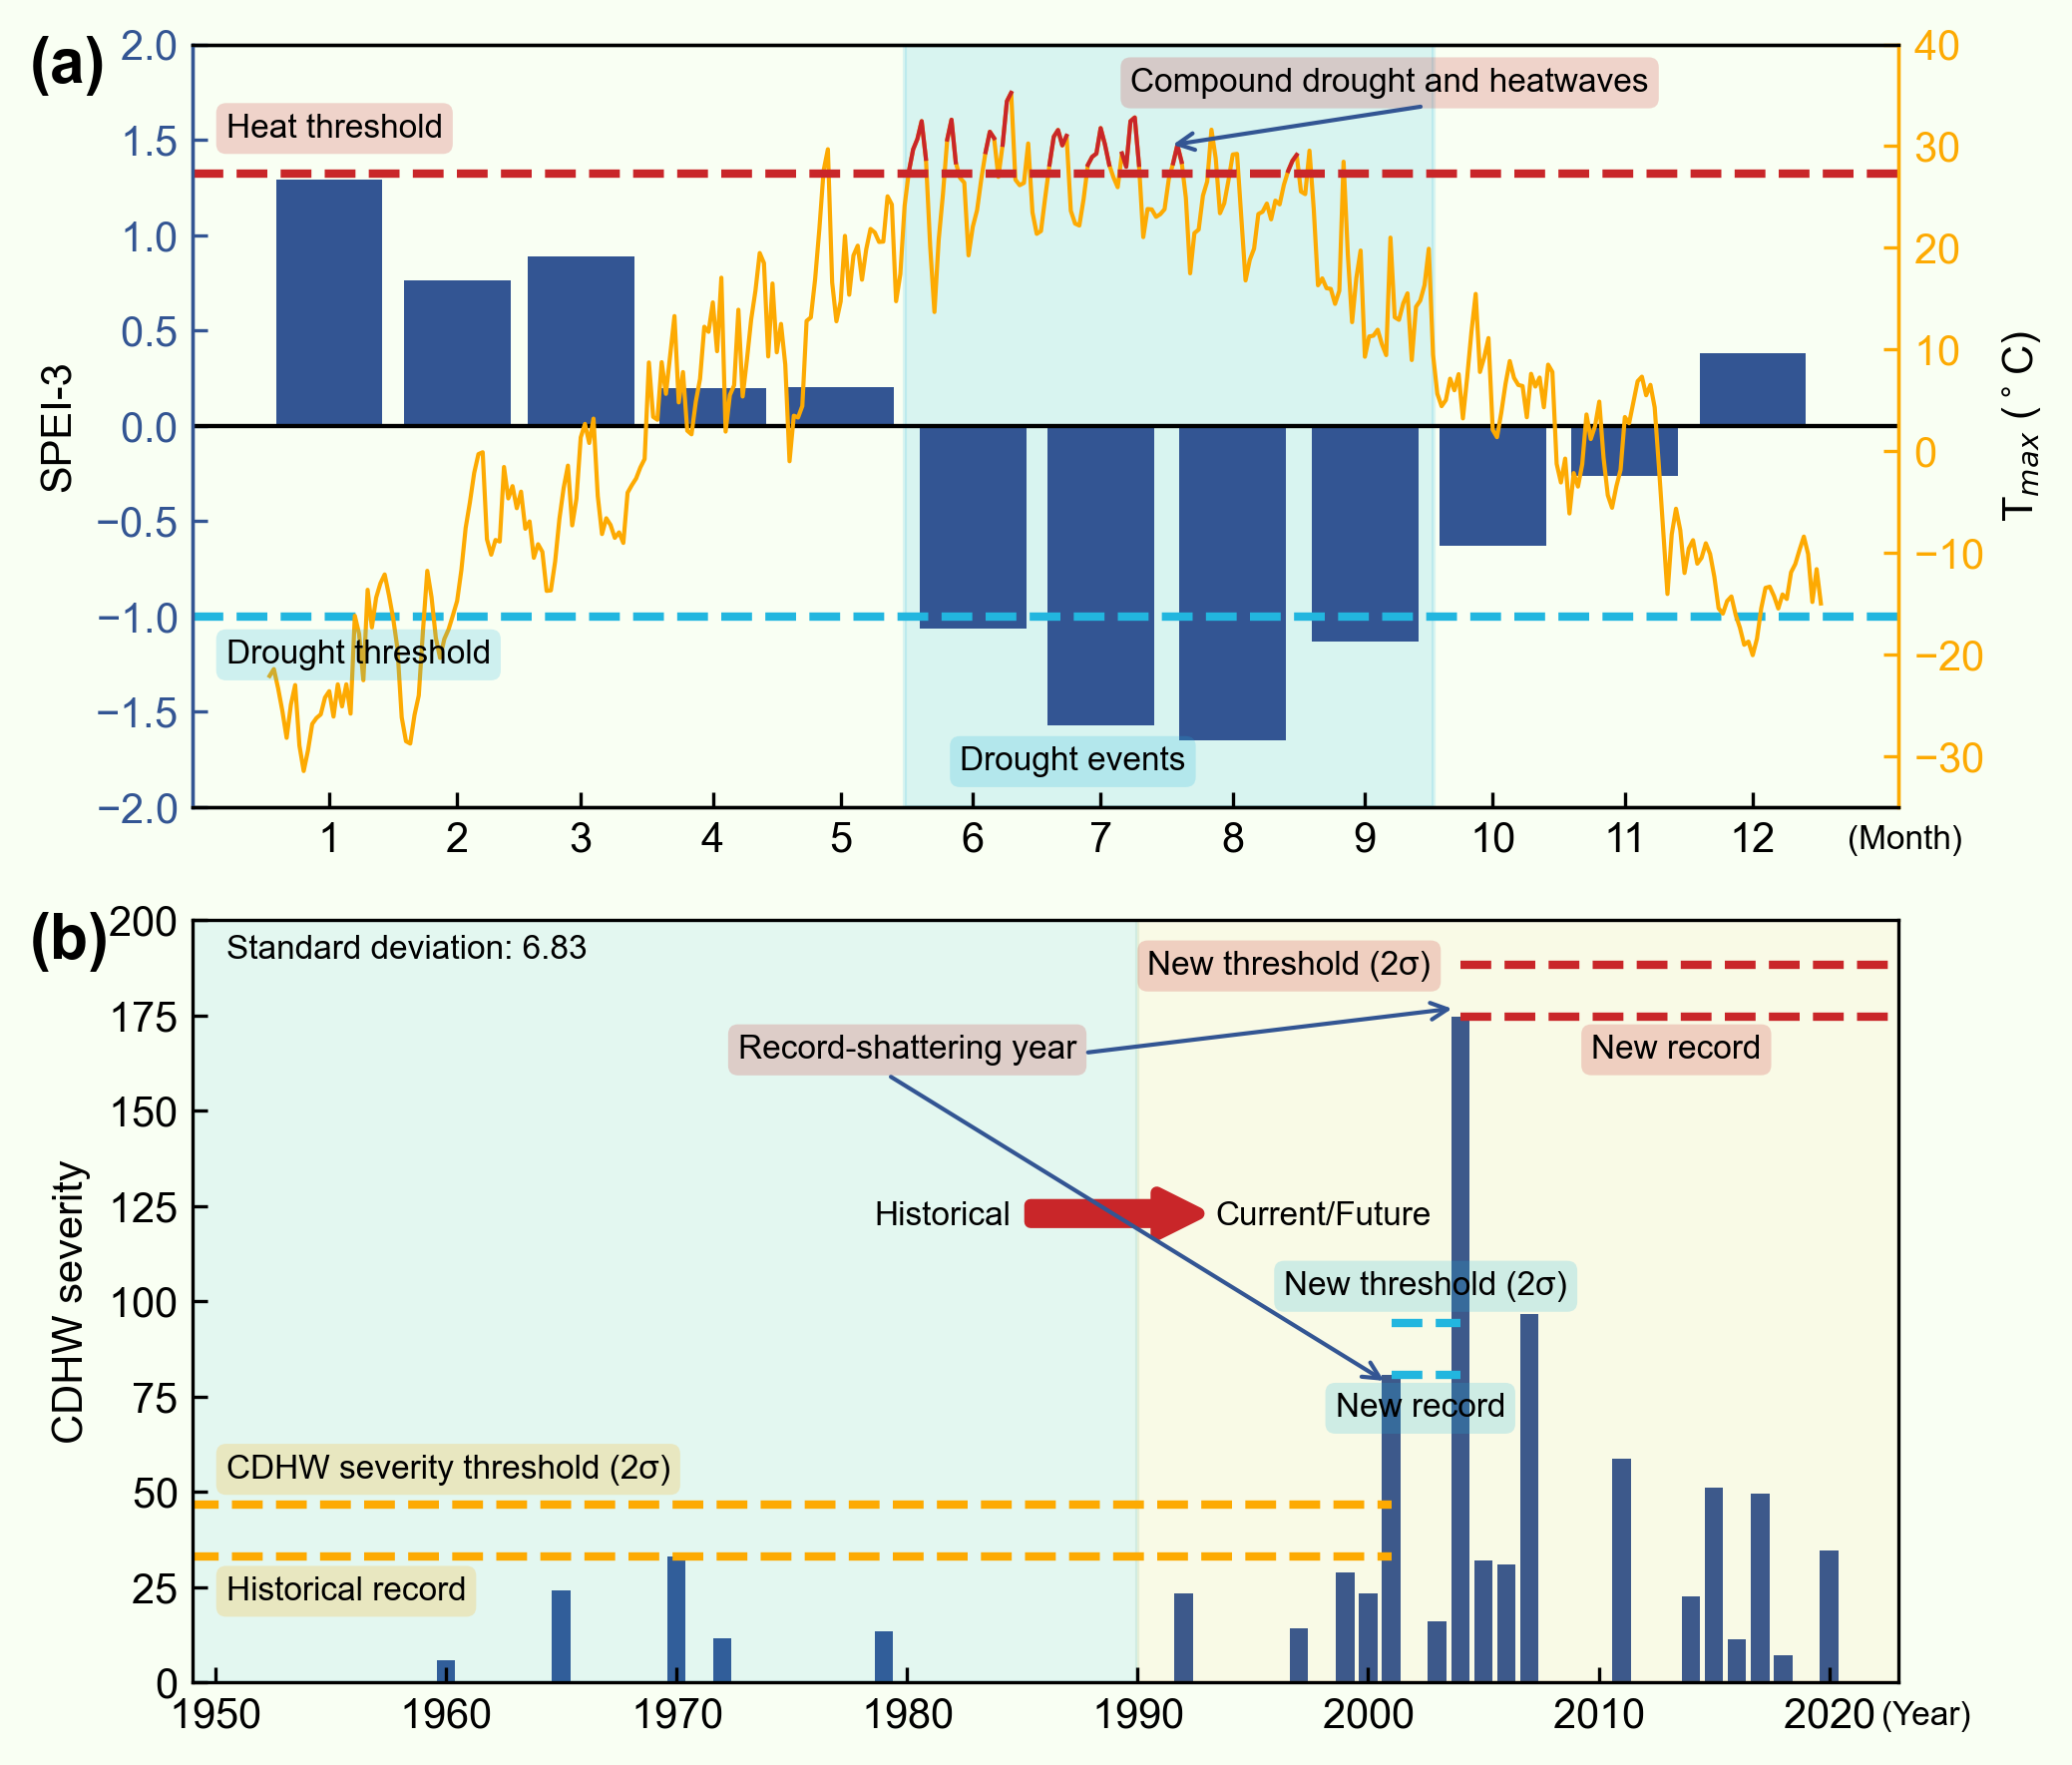

In [22]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.use_mathtext"]=True
# plt.rcParams['xtick.direction'] = 'in'
fig = plt.figure(figsize=(7, 6), dpi=300)
ax1 = fig.add_subplot(211)

time2 = pd.date_range(datetime(2001, 1, 1), datetime(2001, 12, 31), freq="1d")
time2_x2 = [datetime(2001, 1, 15), datetime(2001, 2, 14), datetime(2001, 3, 15), datetime(2001, 4, 15), datetime(2001, 5, 15), datetime(2001, 6, 15),
           datetime(2001, 7, 15), datetime(2001, 8, 15), datetime(2001, 9, 15), datetime(2001, 10, 15), datetime(2001, 11, 15), datetime(2001, 12, 15)]
#era5 land

ax2 = ax1.twinx()


ax1.bar(time2_x2, SPEI, color='#335593', width=25, zorder=2)
ax1.spines['left'].set_color('#335593')  
ax2.spines['left'].set_color('#335593')  
ax1.spines['right'].set_color('#FDAA02')  
ax2.spines['right'].set_color('#FDAA02')  
ax2.tick_params('y', colors='#FDAA02')  
ax1.tick_params('y', colors='#335593')
ax2.plot(time2, temp, color='#FDAA02',linewidth='1',label='RSE',zorder=1) 
ax2.plot(time2, temp_hw, color='#C92629',linewidth='1',label='RSE',zorder=1) 
#cru
# plt.tick_params(labelsize=10)
# plt.legend(fontsize=8, loc=[0.77, 0.7], edgecolor='k')
ax1.axhline(0, color ='k', lw = 1)
ax1.text(
    -0.095, 0.95, "(a)",
    fontsize=15,
    fontweight="bold",
    transform = ax1.transAxes
)
ax1.axhline(0, color ='k', lw = 1)
ax1.set_ylim(-2, 2)
ax2.set_ylim(-35, 40)
ax1.axhline(-1, color ='#22B6DF', lw = 2, linestyle="--")
ax2.axhline(heat_th, color ='#C92629', lw = 2, linestyle="--")
ax1.tick_params("both", which="major", direction="in")
ax2.tick_params("both", which="major", direction="in")
ax1.set_ylabel("SPEI-3")
ax2.set_ylabel(r"T$_{max}$ ($^\circ$C)")

x_rect = [datetime(2001, 5, 30), datetime(2001, 10, 1)]  # 矩形的横坐标范围
y_rect = [-2, 2]  # 矩形的纵坐标范围

# Drawing Rectangles with Color using fill_between
ax1.fill_between(x_rect, y_rect[0], y_rect[1], color='#22B6DF', alpha=0.15)
props = dict(boxstyle='round', facecolor='#C92629', alpha=0.2, edgecolor="none")
ax1.text(0.02, 0.91, "Heat threshold", transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
props = dict(boxstyle='round', facecolor='#22B6DF', alpha=0.2, edgecolor="none")
ax2.text(0.02, 0.22, "Drought threshold", transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='#22B6DF', alpha=0.2, edgecolor="none")
ax2.text(0.45, 0.08, "Drought events", transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='#C92629', alpha=0.2, edgecolor="none")
ax1.text(0.55, 0.97, "Compound drought and heatwaves", transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
#ax.text(2080,ax.get_ylim()[1]*0.8/(ax.get_ylim()[1]-ax.get_ylim()[0]),label[i],size=15)  
# sns.despine()
x = [datetime(2001, 9, 30), datetime(2001, 7, 30)]
y = [34, 30]

ax2.text(0.97, -0.055, "(Month)", transform=ax1.transAxes, fontsize=8)

# Adding colorful arrow annotations
arrow_props = dict(arrowstyle='->', color='#335593', facecolor='yellow')
ax2.annotate('', xy=(x[1], y[1]), xytext=(x[0], y[0]), arrowprops=arrow_props)
ax1.set_xticks(time2_x2)
ax2.set_xticks(time2_x2)
ax1.set_xticklabels(range(1, 13))

# Record shattering CDHW
ax3 = fig.add_subplot(212)
ax3.bar(range(1952, 2023), cdhw_seve, color="#335593")
ax3.set_ylabel("CDHW severity")
ax3.tick_params("both", which="major", direction="in")
# Define the range of horizontal and vertical coordinates of the rectangle
x_rect = [1945, 1990]
y_rect = [0, 230] 

ax3.fill_between(x_rect, y_rect[0], y_rect[1], color='#22B6DF', alpha=0.1)

x_rect = [1990, 2025] 
y_rect = [0, 230]

ax3.fill_between(x_rect, y_rect[0], y_rect[1], color='#FDAA02', alpha=0.05)
ax3.set_xlim(1949, 2023)
ax3.set_ylim(0, 200)
ax3.text(0.99, -0.055, "(Year)", transform=ax3.transAxes, fontsize=8)
ax3.text(
    -0.095, 0.95, "(b)",
    fontsize=15,
    fontweight="bold",
    transform = ax3.transAxes
)
#historical record
ax3.hlines(cdhw_seve[:39].max(), xmin=1945, xmax=1990+11, color ='#FDAA02', lw = 2, linestyle="--")
ax3.hlines(cdhw_seve[:39].max()+2*cdhw_std, xmin=1945, xmax=1990+11, color ='#FDAA02', lw = 2, linestyle="--")

ax3.hlines(cdhw_seve[:39+12].max(), xmin=1990+11, xmax=1990+11+3, color ='#22B6DF', lw = 2, linestyle="--")
ax3.hlines(cdhw_seve[:39+12].max()+2*cdhw_std, xmin=1990+11, xmax=1990+11+3, color ='#22B6DF', lw = 2, linestyle="--")

ax3.hlines(cdhw_seve[:39+12+4].max(), xmin=1990+11+3, xmax=1990+11+3+30, color ='#C92629', lw = 2, linestyle="--")
ax3.hlines(cdhw_seve[:39+12+4].max()+2*cdhw_std, xmin=1990+11+3, xmax=1990+11+3+30, color ='#C92629', lw = 2, linestyle="--")

props = dict(boxstyle='round', facecolor='#FDAA02', alpha=0.2, edgecolor="none")
ax3.text(0.02, 0.14, "Historical record", transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax3.text(0.02, 0.3, "CDHW severity threshold (2σ)", transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='#22B6DF', alpha=0.2, edgecolor="none")
ax3.text(0.67, 0.38, "New record", transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax3.text(0.64, 0.54, "New threshold (2σ)", transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='#C92629', alpha=0.2, edgecolor="none")
ax3.text(0.82, 0.85, "New record", transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax3.text(0.56, 0.96, "New threshold (2σ)", transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

props = dict(boxstyle='round', facecolor='#C92629', alpha=0.2, edgecolor="none")
ax3.text(0.32, 0.85, "Record-shattering year", transform=ax3.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

x = [1979, 2001]
y = [160, 78]
arrow_props = dict(arrowstyle='->', color='#335593', facecolor='yellow')
ax3.annotate('', xy=(x[1], y[1]), xytext=(x[0], y[0]), arrowprops=arrow_props)

x = [1987.5, 2004]
y = [165, 177]
arrow_props = dict(arrowstyle='->', color='#335593', facecolor='yellow')
ax3.annotate('', xy=(x[1], y[1]), xytext=(x[0], y[0]), arrowprops=arrow_props)

ax1.set_xticks(time2_x2)
ax2.set_xticks(time2_x2)
ax1.set_xticklabels(range(1, 13))

ax3.text(0.02, 0.95, "Standard deviation: 6.83", transform=ax3.transAxes, fontsize=8)

ax3.text(0.4, 0.6, "Historical", transform=ax3.transAxes, fontsize=8)

ax3.text(0.6, 0.6, "Current/Future", transform=ax3.transAxes, fontsize=8)
arrow = FancyArrowPatch((1985, 123), (1993, 123), arrowstyle='simple', mutation_scale=20, color='#C92629', linewidth=3)
ax3.add_patch(arrow)

fig.patch.set_facecolor('#F9FFF3')
ax1.set_facecolor('#F9FFF3')
ax3.set_facecolor('#F9FFF3')
plt.tight_layout()
plt.savefig(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\figs\schema.svg", dpi=300, bbox_inches="tight")

In [158]:
cdhw_std

6.834297

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30'],
              dtype='datetime64[ns]', freq='M')